# Oppgave 6: Diskrete beregninger
## 6.1
### a)
Mønsteret i rekka er slik at neste ledd er lik 1/3 av foregående ledd. Det er umulig å summere alle tallene på en datamaskin, men vi kan summere et stort antall ledd, f.eks. 10 000. Hvis vi kjører programmet for ulike verdier av _N_, ser vi at vi får samme sum uansett om vi velger N lik 100, 1000, 10 000 eller 100 000. Det holder altså faktisk å summere 100 ledd!

In [13]:
x0 = 3
N = 100
x = x0
s = x0

for i in range(1,N):
    x = x*1/3
    s = s + x

print(f'Summen er {s}')


Summen er 4.499999999999999


For å sjekke om rekka konvergerer eller dirvergerer, kan vi undersøke om summen er lik (eller nesten lik) når vi øker N.

In [14]:
x0 = 3
N = 100
M = 10000
x = x0
s1 = x0
s2 = x0
tol = 1E-10

for i in range(1,N):
    x = x*1/3
    s1 = s1 + x

x = x0
for i in range(1,M):
    x = x*1/3
    s2 = s2 + x
    
if abs(s2 - s1) < tol:
    print('Rekka konvergerer')
else:
    print('Rekka divergerer')

Rekka konvergerer


## 6.2

In [20]:
x2 = 1
x1 = 0
N = 100

for i in range(1,N+1):
    x1_ny = x2
    x2 = x2 + x1
    x1 = x1_ny

print(f'Fibonnaccitall nr. {i} er {x2}')

Fibonnaccitall nr. 100 er 573147844013817084101


## 6.3
Her viser vi hvordan du kan lage programmet uten funksjoner først.

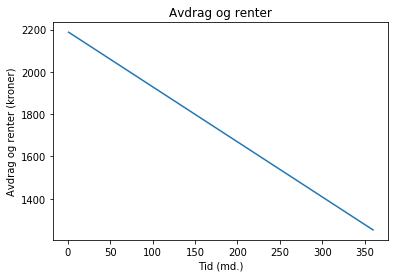

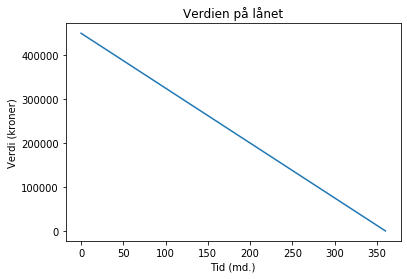

In [49]:
import numpy as np
import matplotlib.pyplot as plt

L = 450000                       # Lån i kroner
p = 2.5                          # Rente per år i %
k = p/(12*100)                   # Vekstfaktor per måned
N = 30*12                        # Nedbetalingstid i måneder

t = np.zeros(N+1)                # Tid i md.
x = np.zeros(N+1)                # Renter og avdrag hver måned
y = np.zeros(N+1)                # Lånets verdi

x[0] = L   
y[0] = 0                         # Ingen avdrag eller renter betales første måned
t[0] = 0

for n in range(N):
    y[n+1] = k*x[n] + L/N
    x[n+1] = x[n] + k*x[n] - y[n+1]
    t[n+1] = n+1

plt.plot(t[1:],y[1:])            # Unngår å plotte første måned pga. ingen avbetaling på lånet
plt.title('Avdrag og renter')
plt.xlabel('Tid (md.)')
plt.ylabel('Avdrag og renter (kroner)')
plt.show()

plt.plot(t,x)  
plt.title('Verdien på lånet')
plt.xlabel('Tid (md.)')
plt.ylabel('Verdi (kroner)')
plt.show()

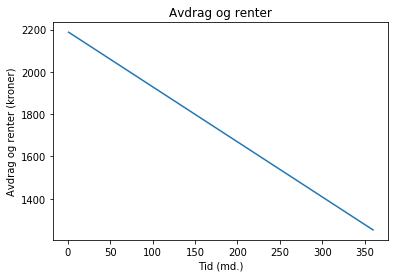

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def studielån(L,p,år):
    k = p/(12*100)
    N = år*12
    t = np.zeros(N+1)                # Tid i md.
    x = np.zeros(N+1)                # Renter og avdrag hver måned
    y = np.zeros(N+1)                # Lånets verdi
    x[0] = L   
    y[0] = 0                         
    t[0] = 0
    for n in range(N):
        y[n+1] = k*x[n] + L/N
        x[n+1] = x[n] + k*x[n] - y[n+1]
        t[n+1] = n+1
    return t, x, y

t, x, y = studielån(450000,2.5,30)
plt.plot(t[1:],y[1:])            # Unngår å plotte første måned pga. ingen avbetaling på lånet
plt.title('Avdrag og renter')
plt.xlabel('Tid (md.)')
plt.ylabel('Avdrag og renter (kroner)')
plt.show()

## 6.4
### a)

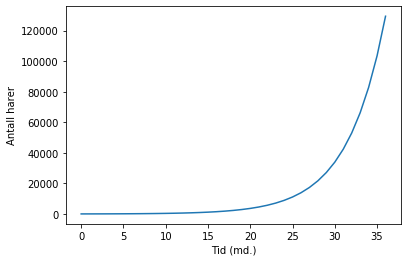

In [57]:
import numpy as np
import matplotlib.pyplot as plt

p0 = 42    # Antall harer ved t0
t0 = 0     # Starttid
k = 25/100 # Vekstfaktor per md.
N = 12*3   # Tid i md.

p = np.zeros(N+1)
t = np.zeros(N+1)
p[0] = p0
t[0] = t0

for i in range(N):
    p[i+1] = p[i] + p[i]*k
    t[i+1] = i+1
    
plt.plot(t,p)
plt.xlabel('Tid (md.)')
plt.ylabel('Antall harer')
plt.show()

### c)

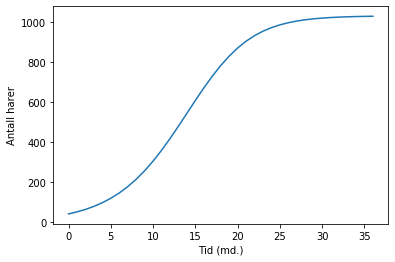

In [58]:
import numpy as np
import matplotlib.pyplot as plt

p0 = 42    # Antall harer ved t0
t0 = 0     # Starttid
k = 25/100 # Vekstfaktor per md.
N = 12*3   # Tid i md.
B = 1030   # Bæreevne

p = np.zeros(N+1)
t = np.zeros(N+1)
p[0] = p0
t[0] = t0

for i in range(N):
    p[i+1] = p[i] + p[i]*k*(1 - p[i]/B)
    t[i+1] = i+1
    
plt.plot(t,p)
plt.xlabel('Tid (md.)')
plt.ylabel('Antall harer')
plt.show()

## 6.5
### a)

In [70]:
import math
import numpy as np
import matplotlib.pyplot as plt

def e_taylor(x, n):
    e_approks = 0
    for i in range(n):
        e_approks += x**i/math.factorial(i)
    return e_approks

### b)

In [71]:

x = 5
for i in range(1,11):
    e_approks = e_taylor(x,i)
    e_exp = np.exp(x)
    e_feil = abs(e_approks - e_exp)
    print(f'{i} ledd i Taylor-tilnærming: \n numerisk = {e_approks}, analytisk = {e_exp}, feil = {e_feil}')

1 ledd i Taylor-tilnærming: 
 numerisk = 1.0, analytisk = 148.4131591025766, feil = 147.4131591025766
2 ledd i Taylor-tilnærming: 
 numerisk = 6.0, analytisk = 148.4131591025766, feil = 142.4131591025766
3 ledd i Taylor-tilnærming: 
 numerisk = 18.5, analytisk = 148.4131591025766, feil = 129.9131591025766
4 ledd i Taylor-tilnærming: 
 numerisk = 39.33333333333333, analytisk = 148.4131591025766, feil = 109.07982576924327
5 ledd i Taylor-tilnærming: 
 numerisk = 65.375, analytisk = 148.4131591025766, feil = 83.0381591025766
6 ledd i Taylor-tilnærming: 
 numerisk = 91.41666666666667, analytisk = 148.4131591025766, feil = 56.99649243590993
7 ledd i Taylor-tilnærming: 
 numerisk = 113.11805555555556, analytisk = 148.4131591025766, feil = 35.29510354702104
8 ledd i Taylor-tilnærming: 
 numerisk = 128.61904761904762, analytisk = 148.4131591025766, feil = 19.79411148352898
9 ledd i Taylor-tilnærming: 
 numerisk = 138.30716765873015, analytisk = 148.4131591025766, feil = 10.105991443846449
10 l

### c)

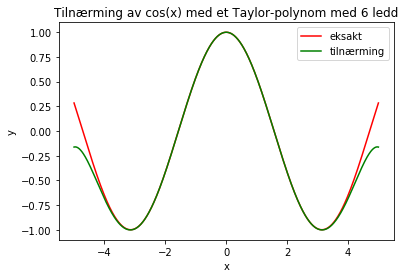

In [77]:
def cos_taylor(x,n):
    cos_approks = 0
    for i in range(n):
        koeffisient = (-1)**i
        teller = x**(2*i)
        nevner = math.factorial(2*i)
        cos_approks += koeffisient*teller/nevner
    return cos_approks

ledd = 6
x = np.linspace(-5,5,1000)
cos_est = cos_taylor(x,6)
cos_eksakt = np.cos(x)

plt.plot(x,cos_eksakt,color='red',label='eksakt')
plt.plot(x,cos_est,color='green',label='tilnærming')
plt.title(f'Tilnærming av cos(x) med et Taylor-polynom med {ledd} ledd')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### d)

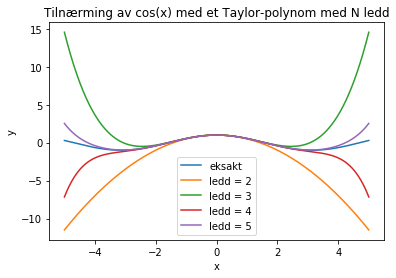

In [84]:
plt.title(f'Tilnærming av cos(x) med et Taylor-polynom med N ledd')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,cos_eksakt,label='eksakt')
x = np.linspace(-5,5,1000)

for ledd in range(2,6):
    cos_est = cos_taylor(x,ledd)
    plt.plot(x,cos_est, label=f'ledd = {ledd}')
plt.legend()
plt.show()